In [4]:
import yfinance as yf

# Fetch data for Apple Inc. (AAPL)
df = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

# Display the first few rows of the dataframe
print(df.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.960472  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.251144  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.826866  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.484360  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.650345  132079200


In [5]:
df.to_csv('AAPL.csv')

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960472,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251144,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826866,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484360,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650345,132079200


In [7]:
df1 = df.reset_index()['Close']

In [8]:
df1.shape

(756,)

In [9]:
import matplotlib.pyplot as plt

<Axes: >

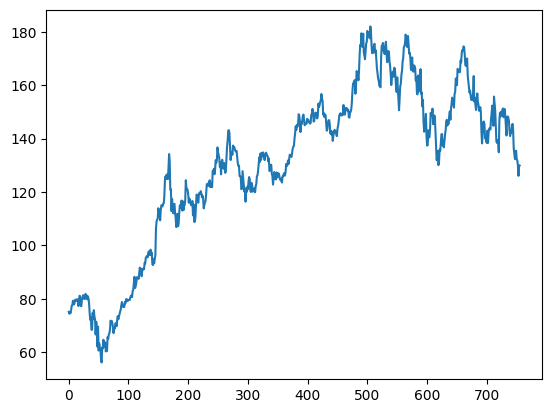

In [10]:
df1.plot()

In [11]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [12]:
df1

array([[0.15085277],
       [0.14505529],
       [0.14976075],
       [0.14696135],
       [0.15649137],
       [0.16927753],
       [0.17066729],
       [0.18383068],
       [0.17533306],
       [0.17267259],
       [0.18041574],
       [0.18734493],
       [0.1830564 ],
       [0.18529994],
       [0.18833764],
       [0.18651102],
       [0.16792745],
       [0.18528007],
       [0.19848314],
       [0.19754999],
       [0.16903929],
       [0.16735166],
       [0.18758317],
       [0.19274529],
       [0.20021045],
       [0.18992596],
       [0.19294378],
       [0.18909205],
       [0.2041615 ],
       [0.19953542],
       [0.19969428],
       [0.18788097],
       [0.19705363],
       [0.190462  ],
       [0.17606765],
       [0.14654436],
       [0.12649154],
       [0.13556496],
       [0.09758373],
       [0.09726605],
       [0.14779519],
       [0.12895351],
       [0.15559791],
       [0.13610106],
       [0.12837772],
       [0.08299089],
       [0.12105149],
       [0.101

In [13]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [16]:
print(X_train)

[[0.15085277 0.14505529 0.14976075 ... 0.18361231 0.1876626  0.18337407]
 [0.14505529 0.14976075 0.14696135 ... 0.1876626  0.18337407 0.18611391]
 [0.14976075 0.14696135 0.15649137 ... 0.18337407 0.18611391 0.1863919 ]
 ...
 [0.7171164  0.68582605 0.71521034 ... 0.85506383 0.83981576 0.86745299]
 [0.68582605 0.71521034 0.70925406 ... 0.83981576 0.86745299 0.91399129]
 [0.71521034 0.70925406 0.72037252 ... 0.86745299 0.91399129 0.94496402]]


In [17]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 [==============================] - 7s 245ms/step - loss: 0.1935 - val_loss: 0.0163
Epoch 2/100
7/7 [==============================] - 0s 44ms/step - loss: 0.0272 - val_loss: 0.0215
Epoch 3/100
7/7 [==============================] - 0s 42ms/step - loss: 0.0190 - val_loss: 0.0199
Epoch 4/100
7/7 [==============================] - 0s 42ms/step - loss: 0.0072 - val_loss: 0.0068
Epoch 5/100
7/7 [==============================] - 0s 43ms/step - loss: 0.0066 - val_loss: 0.0099
Epoch 6/100
7/7 [==============================] - 0s 42ms/step - loss: 0.0055 - val_loss: 0.0060
Epoch 7/100
7/7 [==============================] - 0s 42ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 8/100
7/7 [==============================] - 0s 41ms/step - loss: 0.0040 - val_loss: 0.0069
Epoch 9/100
7/7 [==============================] - 0s 48ms/step - loss: 0.0036 - val_loss: 0.0045
Epoch 10/100
7/7 [==============================] - 0s 39ms/step - loss: 0.0032 - val_loss: 0.0048
Epoch 11/100
7/7 [

In [22]:
import tensorflow as tf

In [23]:
train_predict=model.predict(X_train)    
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 13ms/step


In [24]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

126.3442008751535

In [26]:
math.sqrt(mean_squared_error(ytest,test_predict))

147.0939994241446

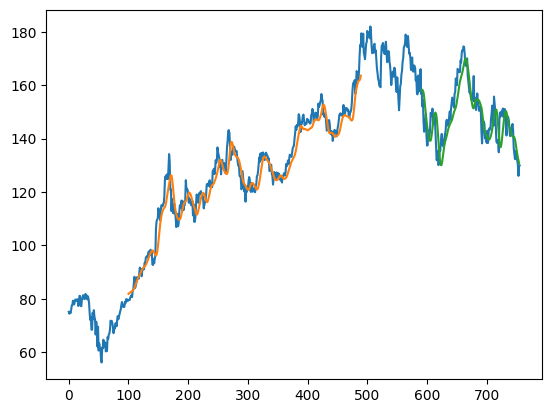

In [27]:
#plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [28]:
len(test_data)

265

In [29]:
X_input=test_data[341:].reshape(1,-1)

In [30]:
X_input.shape

(1, 0)

In [31]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [32]:
lst_output = []
n_steps = 100
i = 0

while i < 30:
    if len(temp_input) > 100:
        X_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, X_input))
        X_input = X_input.reshape(1, -1)
        X_input = X_input.reshape((1, n_steps, 1))
        yhat = model.predict(X_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        if len(temp_input) < n_steps:
            # Initialize temp_input with enough elements if needed
            temp_input = [0] * (n_steps - len(temp_input)) + temp_input
        
        X_input = np.array(temp_input).reshape((1, n_steps, 1))
        yhat = model.predict(X_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

[0.05909764]
101
1 day input [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.  

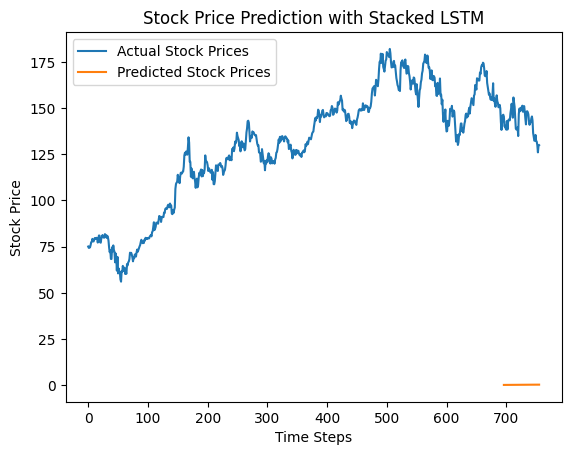

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming lst_output is already populated by the provided code
lst_output = np.array(lst_output)

# Create an array for plotting the predictions
outputPredictPlot = np.empty_like(df1)
outputPredictPlot[:, :] = np.nan
outputPredictPlot[len(df1)-len(lst_output):, :] = lst_output.reshape(-1, 1)

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label='Actual Stock Prices')
plt.plot(outputPredictPlot, label='Predicted Stock Prices')
plt.title('Stock Price Prediction with Stacked LSTM')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [33]:
lst_output = []
n_steps = 100
i = 0

while i < 60:
    if len(temp_input) > 100:
        X_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, X_input))
        X_input = X_input.reshape(1, -1)
        X_input = X_input.reshape((1, n_steps, 1))
        yhat = model.predict(X_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        if len(temp_input) < n_steps:
            # Initialize temp_input with enough elements if needed
            temp_input = [0] * (n_steps - len(temp_input)) + temp_input
        
        X_input = np.array(temp_input).reshape((1, n_steps, 1))
        yhat = model.predict(X_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

0 day input [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.05909764 0.06036208
 0.06322626 0.06753916 0.07295573 0.07910017 0.08564544 0.09234172
 0.0990168  0.1055638  0.11192461 0.11807441 0.12400915 0.12973645
 0.13526943 0.14062326 0.14581296 0.15085253 0.1557547  0.16053066
 0.16519052 0.16974317 0.1741965  0.17855756 0.18283252 0.18702686
 0.1